Data in `../v2_bifdat_1par` and `../v2_bifdat_2par`.

For each directory, full bifurcation diagram data is in `full`, reduced in `redu`. This file will clean both and focus only on 2 par.

# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 2)

In [2]:
# get places where data is disjoint
def get_disjoint_idx(dat,dx=.1,dy=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    x_idx = np.where(np.abs(np.diff(dat[:,0]))>dx)
    y_idx = np.where(np.abs(np.diff(dat[:,1]))>dy)
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(np.diff(dat[:,0]),label='x diff')
    axs.plot(np.diff(dat[:,1]),label='y diff')
    axs.legend()
    plt.show()
    return np.union1d(x_idx[0],y_idx[0])

In [3]:
# get places where data changes direction abruptly
# specifically, where the velocity vector changes rapidly (e.g., flips)
def get_direction_change_idx(dat,dtheta=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    velocity = np.diff(dat[:,:2],axis=0)

    # angle of velocity
    theta = np.arctan2(velocity[:,1],velocity[:,0])

    diff = np.mod(np.diff(theta)+np.pi,2*np.pi)-np.pi

    idx = np.where(np.abs(diff)>dtheta)[0]
    
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(np.abs(diff),label='theta abs diff')
    axs.axhline(dtheta,ls='--',color='gray',label='treshold')
    # axs.plot(theta,label='theta')
    axs.legend()
    plt.show()
    return idx

In [4]:
# get places where data changes magnitude abruptly
def get_magnitude_change_idx(dat,dx=.1):
    """
    assume write points data two par (not allpts data) from XPP, no oscillations
    """
    pts = np.linalg.norm(np.diff(dat[:,:2],axis=0),axis=1)

    idx = np.where(pts>dx)[0]+1
    
    fig,axs = plt.subplots(figsize=(4,2))
    axs.plot(pts,label='velocity norm')
    axs.legend()
    plt.show()
    return idx

In [5]:
def exclude_small_idx_range(idxs,min_neighbors = 10):
    """
    Remove idx from idxs if neighbors are too close.
    Helpful when there are too many curves with small numbers of points
    """

    idxs_new = []

    if idxs[1]-idxs[0] > min_neighbors:
        idxs_new.append(idxs[0])

    for i in range(1,len(idxs)-1):
        if (idxs[i]-idxs[i-1] > min_neighbors) and (idxs[i+1]-idxs[i] > min_neighbors):
            idxs_new.append(idxs[i])

    if idxs[-1]-idxs[-2] > min_neighbors:
        idxs_new.append(idxs[-1])
    return np.array(idxs_new)
    

In [6]:
def disjoint_curves_list(dat,idxs):
    """
    collect curves. +1 and -1 is to exclude the discontinuous point
    length_threshold: if number of elements in curve is less than length_threshold, discard.
    """
    disjoint_curves = []
    disjoint_curves.append(dat[:idxs[0]-1,:2])
    
    for i in range(1,len(idxs)):
        disjoint_curves.append(dat[idxs[i-1]+1:idxs[i]-1,:2])

    disjoint_curves.append(dat[idxs[-1]+1:,:2])
    return disjoint_curves

In [7]:
def plot_disjoint_curves(disjoint_curves):
    fig,axs = plt.subplots(figsize=(4,2))
    for i in range(len(disjoint_curves)):
        axs.plot(disjoint_curves[i][:,1],disjoint_curves[i][:,0],label=str(i))
    axs.set_xlabel('delta')
    axs.set_ylabel('eps')
    # axs.set_xlim(0,.1)
    # axs.set_ylim(-.02,.02)
    axs.legend()

This section serves as a documentation and template for all other sections.

Load 2 parameter diagram for $\delta<0$ and $\delta>0$ (neg, pos, respectively.)

# thal2 Reduced

## 1:1

In [9]:
ratio = '11'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'

thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 1:1 neg

In [10]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

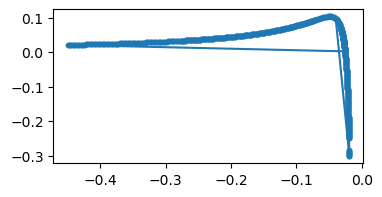

In [11]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [12]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

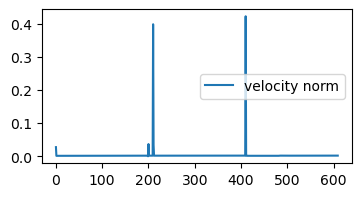

In [13]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [14]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [15]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [16]:
print(idxs)

[211 411]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [17]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

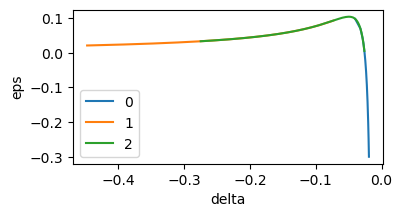

In [18]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to keep curves 1 and 2.

Create a new empty array, concatenate curves 1 and 2 in a consistent order, save to file.

In [19]:
curves = np.concatenate([disjoint_curves[0],disjoint_curves[2],disjoint_curves[1][::-1]])

In [20]:
y,x = curves.T

Plot to double check before saving

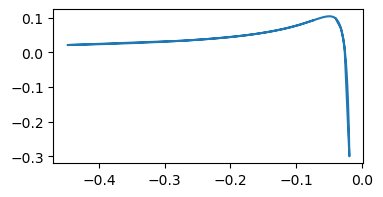

In [21]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [22]:
np.savetxt(fname_new,curves)

### 1:1 neg2

In [23]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

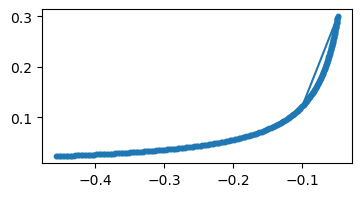

In [24]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [25]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

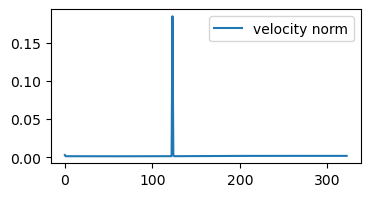

In [26]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [27]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [28]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [29]:
print(idxs)

[124]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [30]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

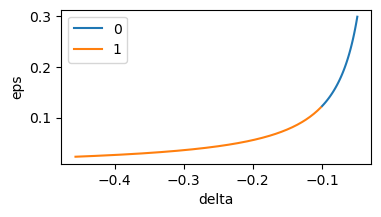

In [31]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to keep curves 1 and 2.

Create a new empty array, concatenate curves 1 and 2 in a consistent order, save to file.

In [32]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [33]:
y,x = curves.T

Plot to double check before saving

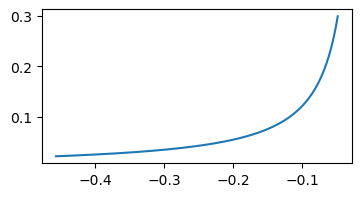

In [34]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [35]:
np.savetxt(fname_new,curves)

### 1:1 pos

In [36]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

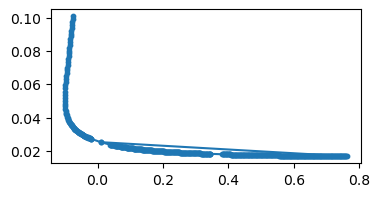

In [37]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

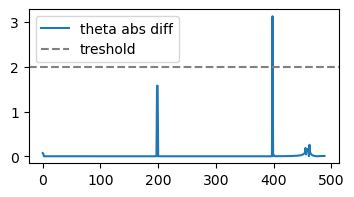

In [38]:
idxs1 = get_direction_change_idx(dat,dtheta=2)

In [39]:
print(idxs1)

[398]


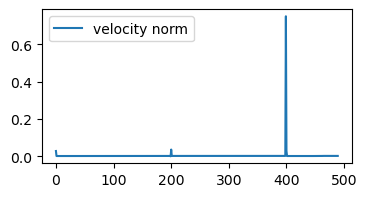

In [40]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [41]:
print(idxs2)

[400]


Get union of large angle and magnitude change.

In [42]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [43]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [44]:
print(idxs)

[400]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [45]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

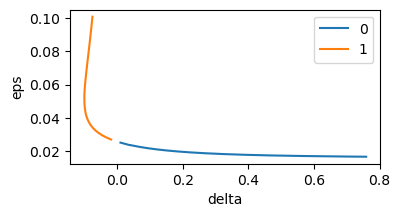

In [46]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to exclude curve index 2

In [47]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [48]:
y,x = curves.T

Plot to double check before saving

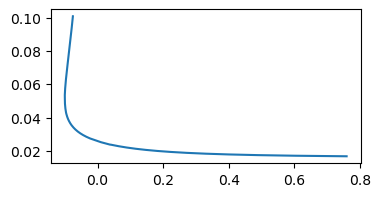

In [49]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [50]:
np.savetxt(fname_new,curves)

## 1:2

In [51]:
ratio = '12'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_12_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 1:2 pos

In [52]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

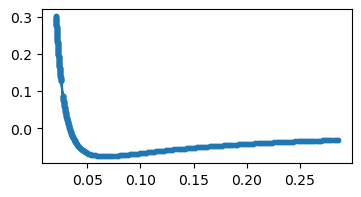

In [53]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

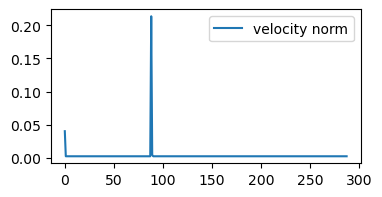

In [54]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [55]:
idxs = idxs2

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [56]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

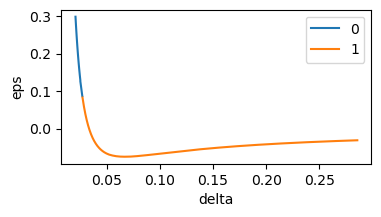

In [57]:
plot_disjoint_curves(disjoint_curves)

In [58]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[0]])

In [59]:
y,x = curves.T

Plot to double check before saving

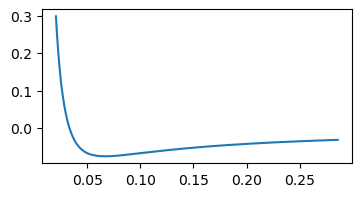

In [60]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [61]:
np.savetxt(fname_new,curves)

### 1:2 neg

In [62]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

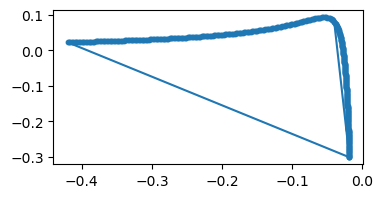

In [63]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [64]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

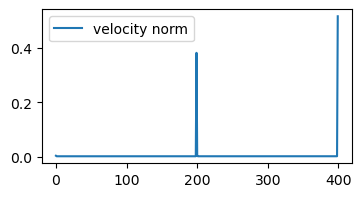

In [65]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [66]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [67]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [68]:
print(idxs)

[200 400]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [69]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

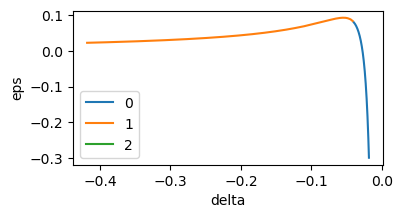

In [70]:
plot_disjoint_curves(disjoint_curves)

Based on the above plot, I want to keep curves 1 and 2.

Create a new empty array, concatenate curves 1 and 2 in a consistent order, save to file.

In [71]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [72]:
y,x = curves.T

Plot to double check before saving

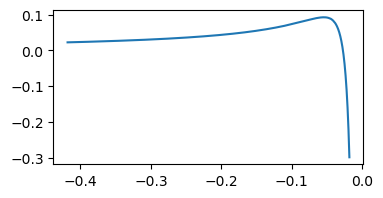

In [73]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [74]:
np.savetxt(fname_new,curves)

### 1:2 neg2

In [75]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

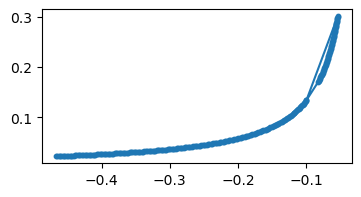

In [76]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [77]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

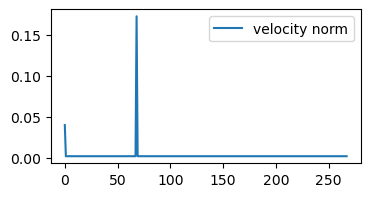

In [78]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [79]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [80]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [81]:
print(idxs)

[69]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [82]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

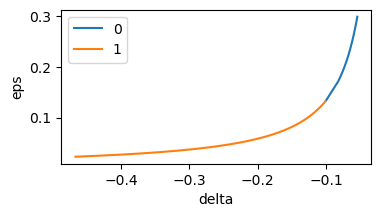

In [83]:
plot_disjoint_curves(disjoint_curves)

In [84]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [85]:
y,x = curves.T

Plot to double check before saving

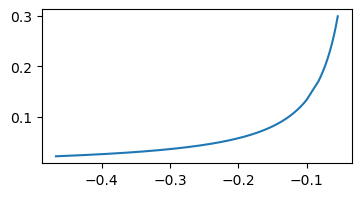

In [86]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [87]:
np.savetxt(fname_new,curves)

## 2:1

In [88]:
ratio = '21'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_21_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 2:1 neg

In [89]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

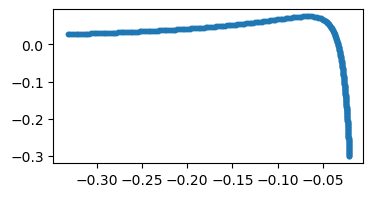

In [90]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [91]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

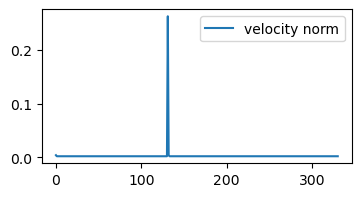

In [92]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [93]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [94]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [95]:
print(idxs)

[132]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [96]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

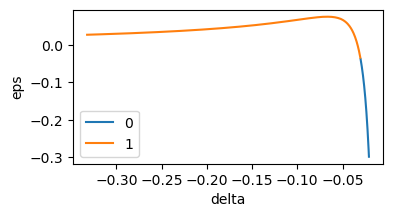

In [97]:
plot_disjoint_curves(disjoint_curves)

In [98]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [99]:
y,x = curves.T

Plot to double check before saving

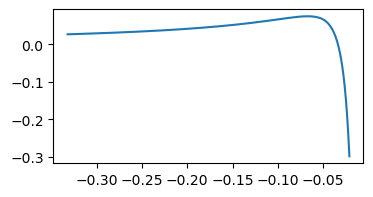

In [100]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [101]:
np.savetxt(fname_new,curves)

### 2:1 neg2

In [102]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

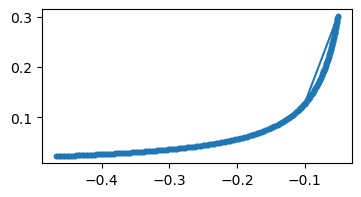

In [103]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [104]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

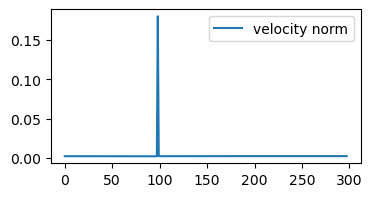

In [105]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [106]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [107]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [108]:
print(idxs)

[99]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [109]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

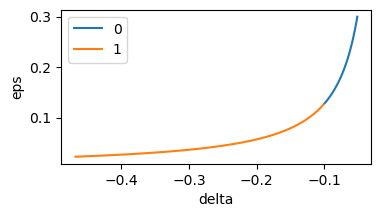

In [110]:
plot_disjoint_curves(disjoint_curves)

In [111]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [112]:
y,x = curves.T

Plot to double check before saving

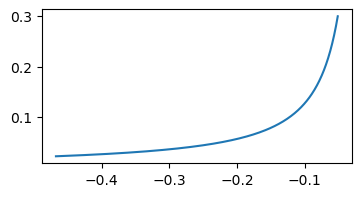

In [113]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [114]:
np.savetxt(fname_new,curves)

### 2:1 pos

In [115]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

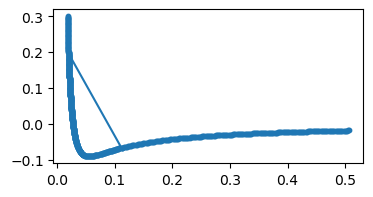

In [116]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

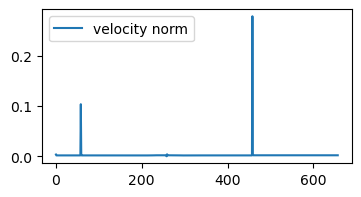

In [117]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

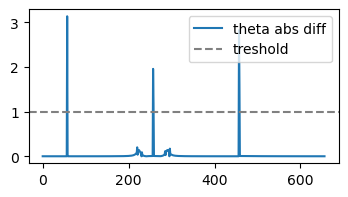

[ 57 257 258 457 458]


In [118]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [119]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [120]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

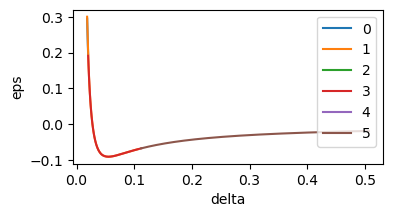

In [121]:
plot_disjoint_curves(disjoint_curves)

In [122]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[3][::-1],disjoint_curves[5]])

In [123]:
y,x = curves.T

Plot to double check before saving

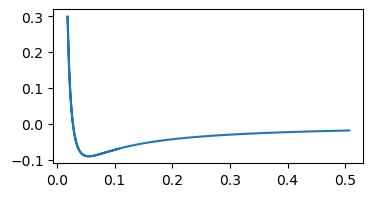

In [124]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [125]:
np.savetxt(fname_new,curves)

## 1:3

In [126]:
ratio = '13'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_21_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 1:3 neg

In [127]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

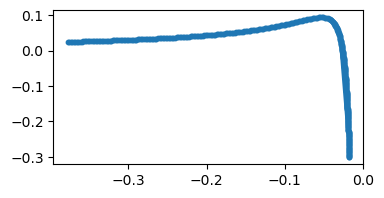

In [128]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [129]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

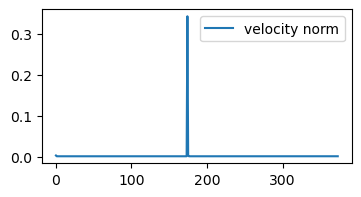

In [130]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [131]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [132]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [133]:
print(idxs)

[175]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [134]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

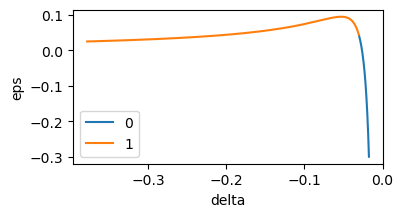

In [135]:
plot_disjoint_curves(disjoint_curves)

In [136]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [137]:
y,x = curves.T

Plot to double check before saving

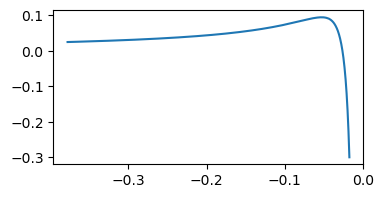

In [138]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [139]:
np.savetxt(fname_new,curves)

### 1:3 neg2

In [150]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

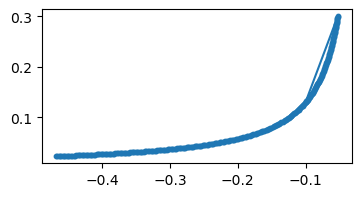

In [151]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [152]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

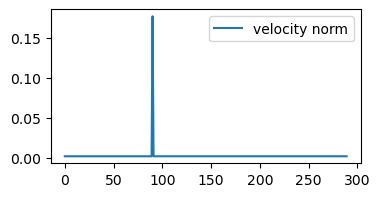

In [153]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [154]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [155]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [156]:
print(idxs)

[91]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [157]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

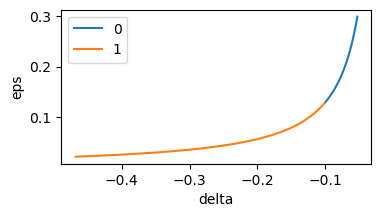

In [158]:
plot_disjoint_curves(disjoint_curves)

In [159]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [160]:
y,x = curves.T

Plot to double check before saving

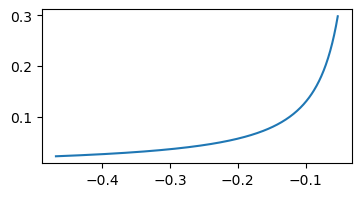

In [161]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [162]:
np.savetxt(fname_new,curves)

### 1:3 pos

In [492]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

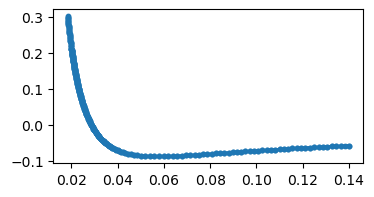

In [493]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

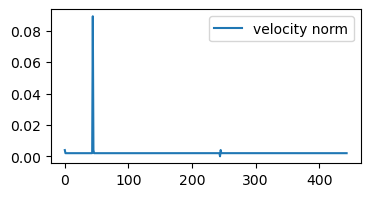

In [494]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

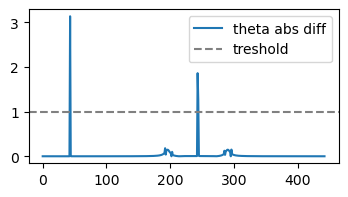

[ 43 243 244]


In [495]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [496]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [497]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

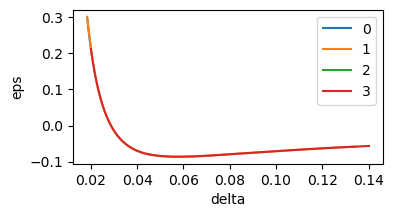

In [498]:
plot_disjoint_curves(disjoint_curves)

In [501]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[3][::-1]])

In [502]:
y,x = curves.T

Plot to double check before saving

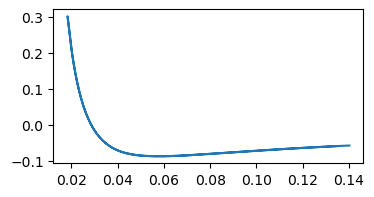

In [503]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [504]:
np.savetxt(fname_new,curves)

## 3:1

In [231]:
ratio = '31'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_21_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 3:1 neg

In [232]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

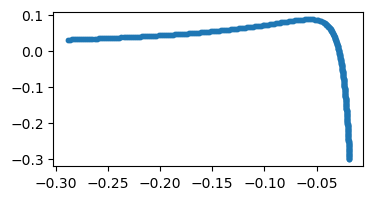

In [233]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [234]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

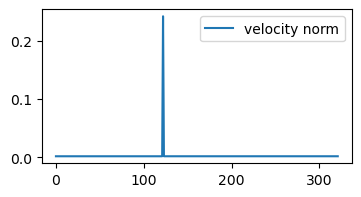

In [235]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [236]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [237]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [238]:
print(idxs)

[123]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [239]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

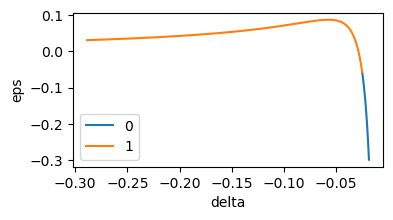

In [240]:
plot_disjoint_curves(disjoint_curves)

In [241]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [242]:
y,x = curves.T

Plot to double check before saving

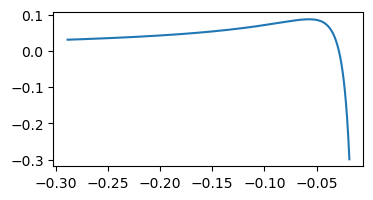

In [243]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [244]:
np.savetxt(fname_new,curves)

### 2:3 neg2

In [245]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

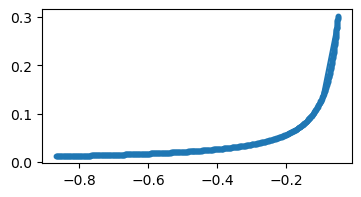

In [246]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [247]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

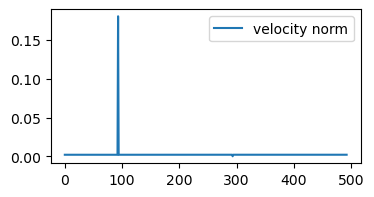

In [248]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [249]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [250]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [251]:
print(idxs)

[94]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [252]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

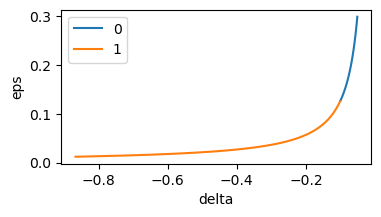

In [253]:
plot_disjoint_curves(disjoint_curves)

In [254]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [255]:
y,x = curves.T

Plot to double check before saving

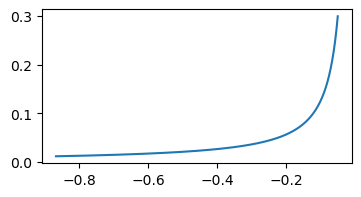

In [256]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [257]:
np.savetxt(fname_new,curves)

### 3:1 pos

In [258]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

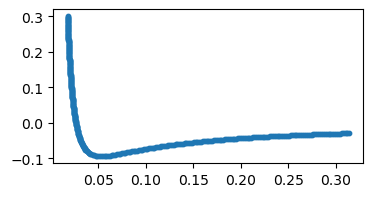

In [259]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

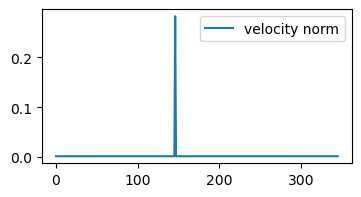

In [260]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

In [261]:
idxs =  idxs2

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [262]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

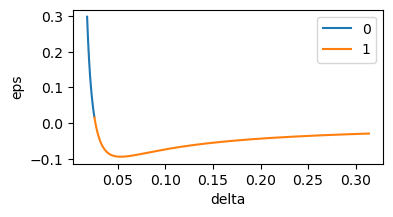

In [263]:
plot_disjoint_curves(disjoint_curves)

In [264]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[0]])

In [265]:
y,x = curves.T

Plot to double check before saving

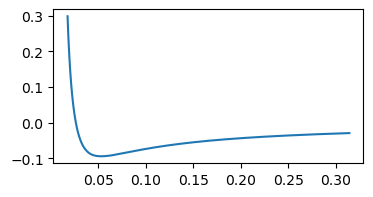

In [266]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [267]:
np.savetxt(fname_new,curves)

## 2:3

In [166]:
ratio = '23'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_23_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 2:3 neg

In [167]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

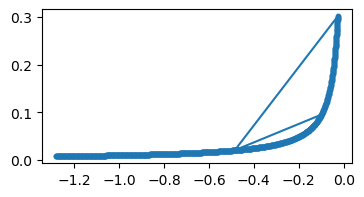

In [168]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [169]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

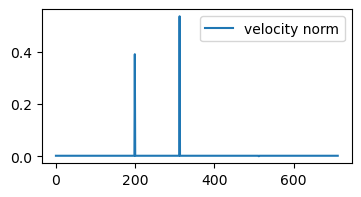

In [170]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [171]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [172]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [173]:
print(idxs)

[200 313]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [174]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

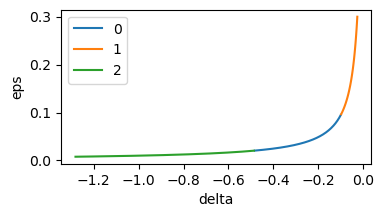

In [175]:
plot_disjoint_curves(disjoint_curves)

In [187]:
curves = np.concatenate([disjoint_curves[2][::-1],disjoint_curves[0][::-1],disjoint_curves[1]])

In [188]:
y,x = curves.T

Plot to double check before saving

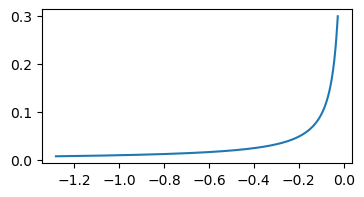

In [189]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [190]:
np.savetxt(fname_new,curves)

### 2:3 neg2

In [191]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

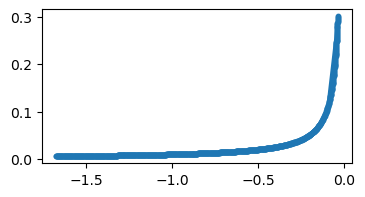

In [192]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [193]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

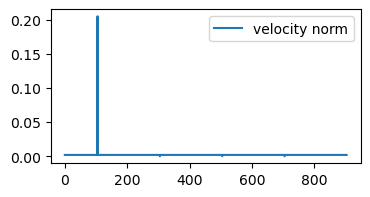

In [194]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [195]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [196]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [197]:
print(idxs)

[106]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [198]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

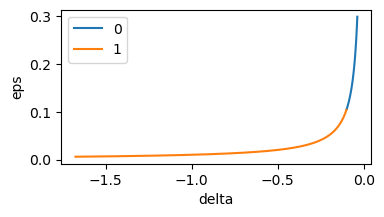

In [199]:
plot_disjoint_curves(disjoint_curves)

In [200]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [201]:
y,x = curves.T

Plot to double check before saving

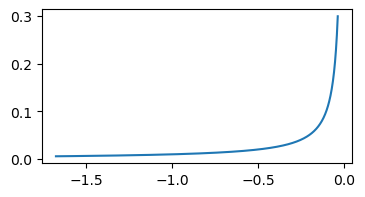

In [202]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [203]:
np.savetxt(fname_new,curves)

### 2:3 pos

In [204]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

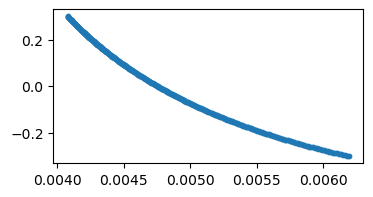

In [205]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

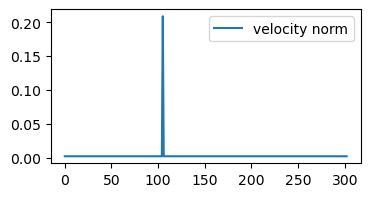

In [206]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

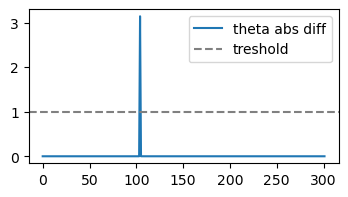

[104]


In [207]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [208]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [209]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

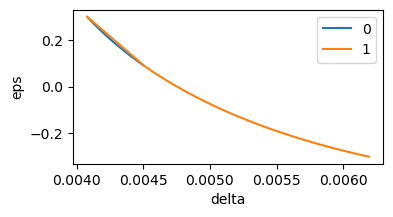

In [210]:
plot_disjoint_curves(disjoint_curves)

In [218]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[0][::-1]])

In [219]:
y,x = curves.T

Plot to double check before saving

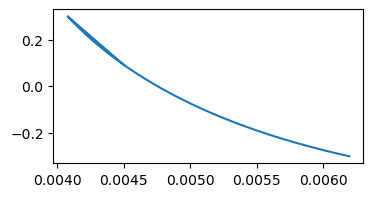

In [220]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [221]:
np.savetxt(fname_new,curves)

## 2:3 2k

In [9]:
ratio = '23_2k'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_23_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 2:3 neg

In [10]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

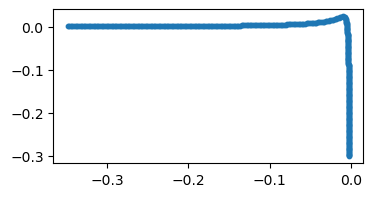

In [11]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [12]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

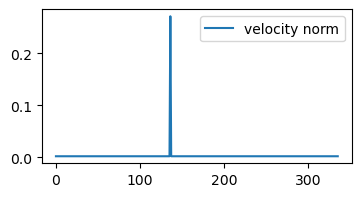

In [13]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [14]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [15]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [16]:
print(idxs)

[137]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [17]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

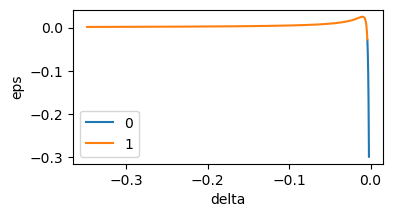

In [18]:
plot_disjoint_curves(disjoint_curves)

In [21]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [22]:
y,x = curves.T

Plot to double check before saving

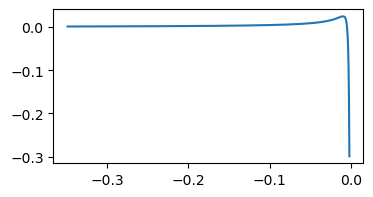

In [23]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [24]:
np.savetxt(fname_new,curves)

### 2:3 neg2

In [25]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

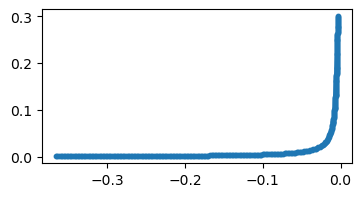

In [26]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [27]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

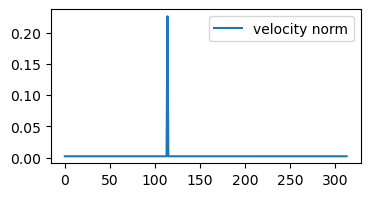

In [28]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [29]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [30]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [31]:
print(idxs)

[115]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [32]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

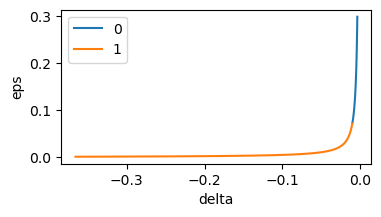

In [33]:
plot_disjoint_curves(disjoint_curves)

In [34]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [35]:
y,x = curves.T

Plot to double check before saving

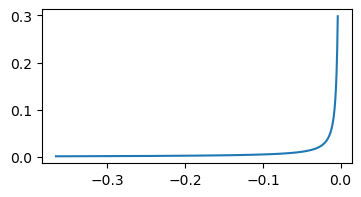

In [36]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [37]:
np.savetxt(fname_new,curves)

### 2:3 pos

In [38]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

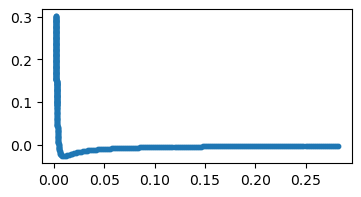

In [39]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

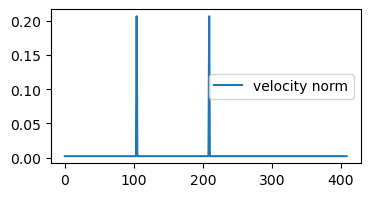

In [40]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

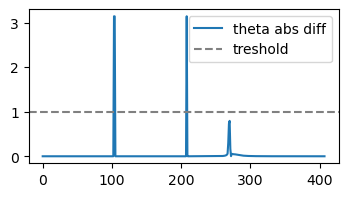

[103 104 208]


In [41]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [42]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [43]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

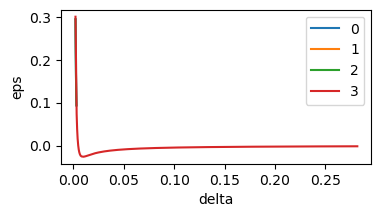

In [44]:
plot_disjoint_curves(disjoint_curves)

In [49]:
curves = np.concatenate([disjoint_curves[3][::-1],])

In [50]:
y,x = curves.T

Plot to double check before saving

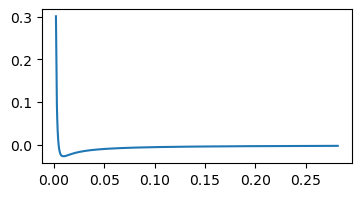

In [51]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [52]:
np.savetxt(fname_new,curves)

## 3:2

In [268]:
ratio = '32'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_23_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_neg3 = np.loadtxt(fname.format('neg3'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 3:2 neg

In [269]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

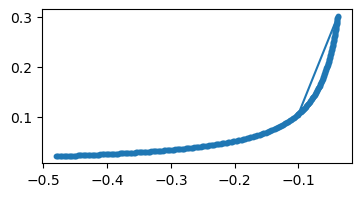

In [270]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [271]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

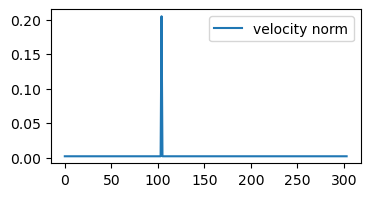

In [272]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [273]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [274]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [275]:
print(idxs)

[105]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [276]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

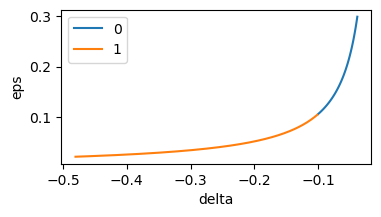

In [277]:
plot_disjoint_curves(disjoint_curves)

In [280]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1],])

In [281]:
y,x = curves.T

Plot to double check before saving

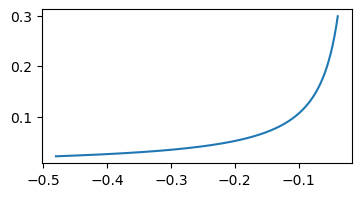

In [282]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [283]:
np.savetxt(fname_new,curves)

### 3:2 neg2

In [284]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

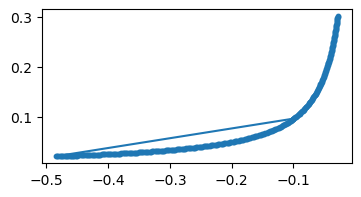

In [285]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [286]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

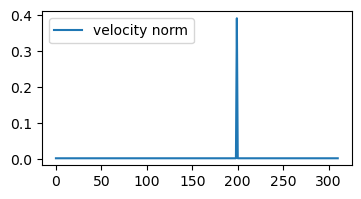

In [287]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [288]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [289]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [290]:
print(idxs)

[200]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [291]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

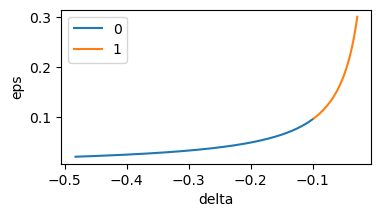

In [292]:
plot_disjoint_curves(disjoint_curves)

In [293]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [294]:
y,x = curves.T

Plot to double check before saving

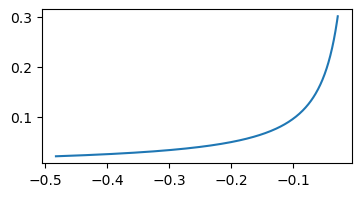

In [295]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [296]:
np.savetxt(fname_new,curves)

### 3:2 neg3

In [297]:
dat = thal1f_neg3
fname_new = fname.format('neg3_fixed')

Visualize the raw data

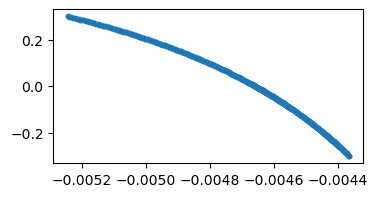

In [298]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [299]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

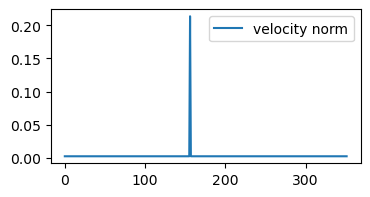

In [300]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [301]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [302]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [303]:
print(idxs)

[157]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [304]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

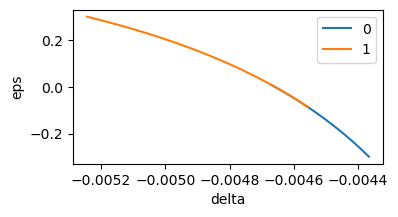

In [305]:
plot_disjoint_curves(disjoint_curves)

In [315]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1]])

In [316]:
y,x = curves.T

Plot to double check before saving

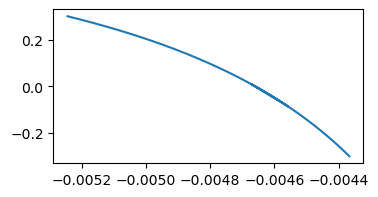

In [317]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [318]:
np.savetxt(fname_new,curves)

### 3:2 pos

In [319]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

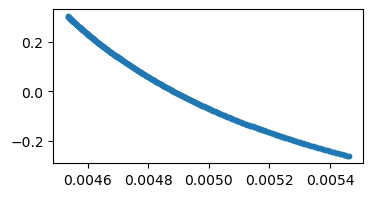

In [320]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

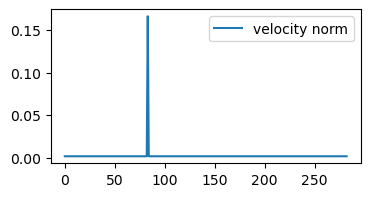

In [321]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

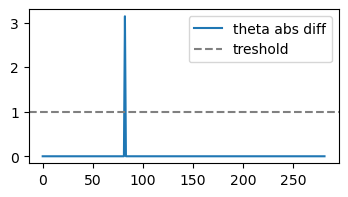

[82]


In [322]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [323]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [324]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

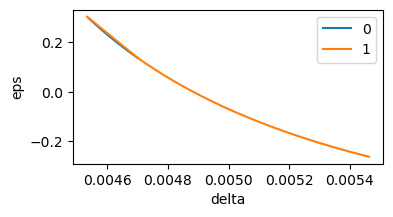

In [325]:
plot_disjoint_curves(disjoint_curves)

In [326]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[0][::-1]])

In [327]:
y,x = curves.T

Plot to double check before saving

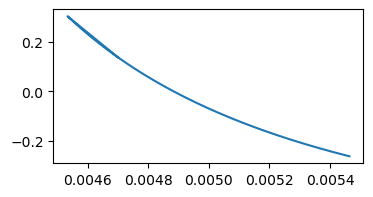

In [328]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [329]:
np.savetxt(fname_new,curves)

## 3:2 2k

In [54]:
ratio = '32_2k'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_23_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
# thal1f_neg3 = np.loadtxt(fname.format('neg3'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 3:2 neg

In [55]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

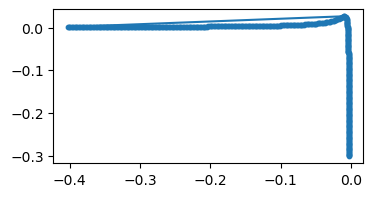

In [56]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [57]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

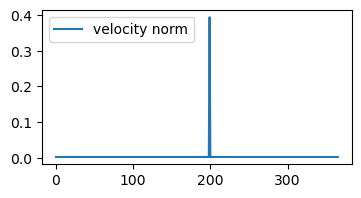

In [58]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [59]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [60]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [61]:
print(idxs)

[200]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [62]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

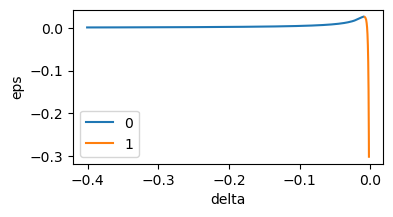

In [63]:
plot_disjoint_curves(disjoint_curves)

In [64]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1],])

In [65]:
y,x = curves.T

Plot to double check before saving

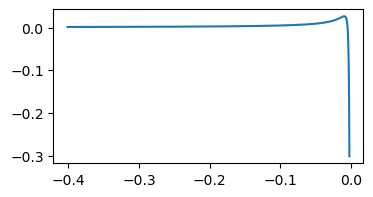

In [66]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [67]:
np.savetxt(fname_new,curves)

### 3:2 neg2

In [68]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

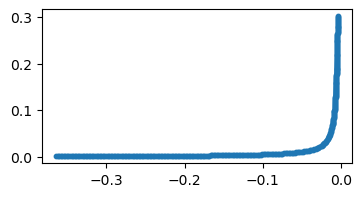

In [69]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [70]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

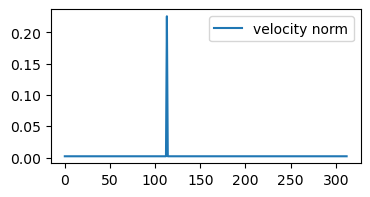

In [71]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [72]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [73]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [74]:
print(idxs)

[114]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [75]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

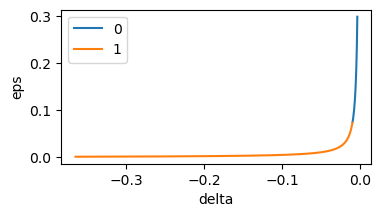

In [76]:
plot_disjoint_curves(disjoint_curves)

In [77]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [78]:
y,x = curves.T

Plot to double check before saving

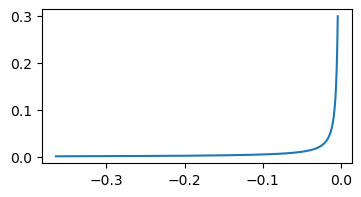

In [79]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [80]:
np.savetxt(fname_new,curves)

### 3:2 pos

In [81]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

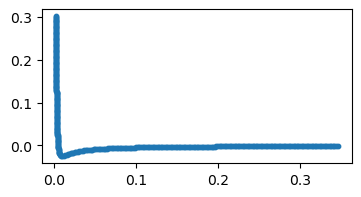

In [82]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

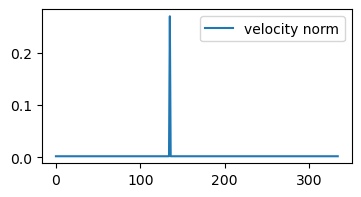

In [83]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

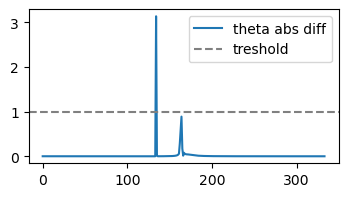

[134]


In [84]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [85]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [86]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

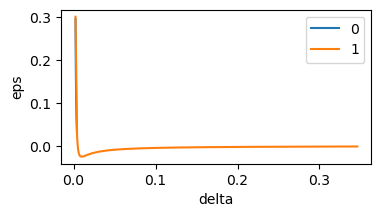

In [87]:
plot_disjoint_curves(disjoint_curves)

In [90]:
curves = np.concatenate([disjoint_curves[1][::-1]])

In [91]:
y,x = curves.T

Plot to double check before saving

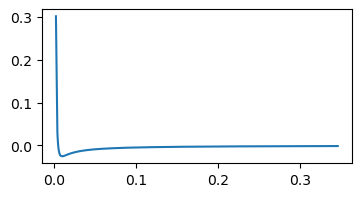

In [92]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [93]:
np.savetxt(fname_new,curves)

## 3:4

In [438]:
ratio = '34'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_23_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_neg3 = np.loadtxt(fname.format('neg3'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 3:4 neg

In [439]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

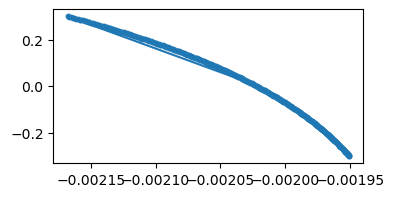

In [440]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [441]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

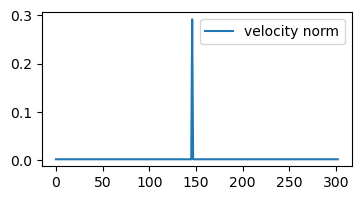

In [442]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [443]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [444]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [445]:
print(idxs)

[147]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [446]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

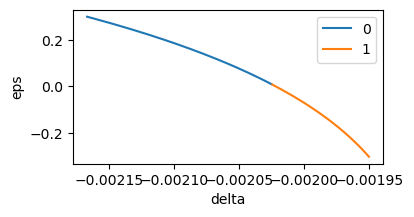

In [447]:
plot_disjoint_curves(disjoint_curves)

In [448]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1],])

In [449]:
y,x = curves.T

Plot to double check before saving

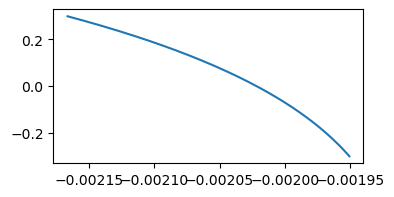

In [450]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [451]:
np.savetxt(fname_new,curves)

### 3:4 neg2

In [452]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

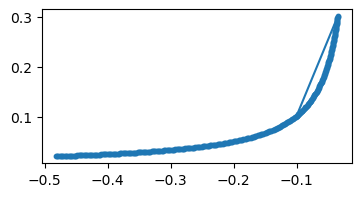

In [453]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [454]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

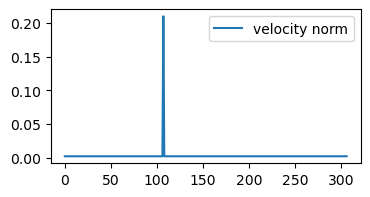

In [455]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [456]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [457]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [458]:
print(idxs)

[108]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [459]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

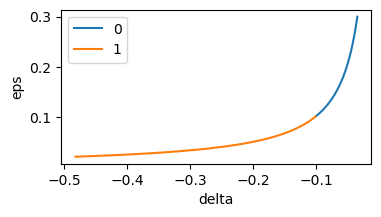

In [460]:
plot_disjoint_curves(disjoint_curves)

In [461]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [462]:
y,x = curves.T

Plot to double check before saving

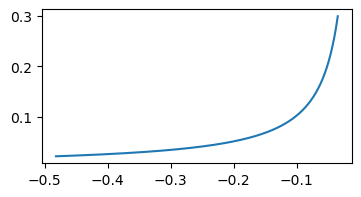

In [463]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [464]:
np.savetxt(fname_new,curves)

### 3:4 neg3

In [465]:
dat = thal1f_neg3
fname_new = fname.format('neg3_fixed')

Visualize the raw data

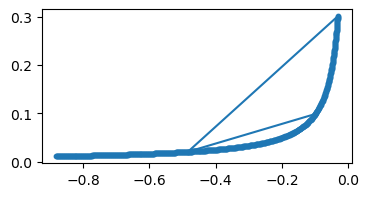

In [466]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [467]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

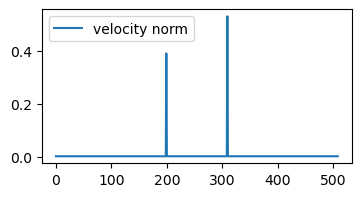

In [468]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [469]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [470]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [471]:
print(idxs)

[200 310]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [472]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

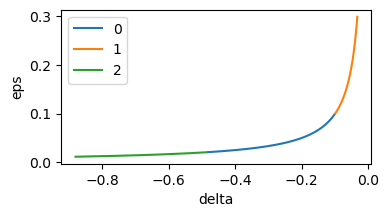

In [473]:
plot_disjoint_curves(disjoint_curves)

In [474]:
curves = np.concatenate([disjoint_curves[2][::-1],disjoint_curves[0][::-1],disjoint_curves[1]])

In [475]:
y,x = curves.T

Plot to double check before saving

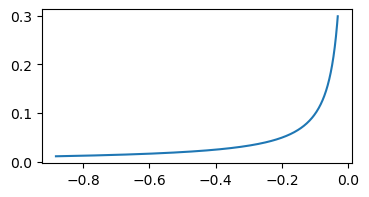

In [476]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [477]:
np.savetxt(fname_new,curves)

### 3:4 pos

In [478]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

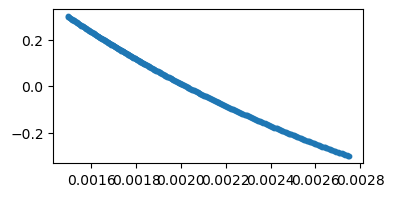

In [479]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

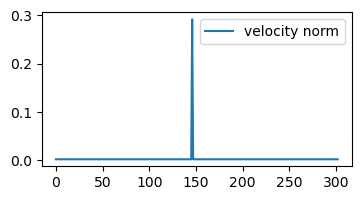

In [480]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

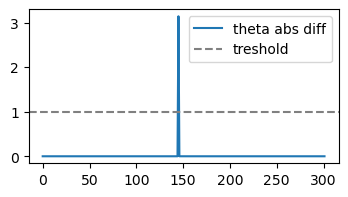

[145]


In [481]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [482]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [483]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

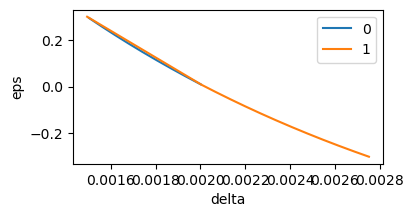

In [484]:
plot_disjoint_curves(disjoint_curves)

In [485]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[0][::-1]])

In [486]:
y,x = curves.T

Plot to double check before saving

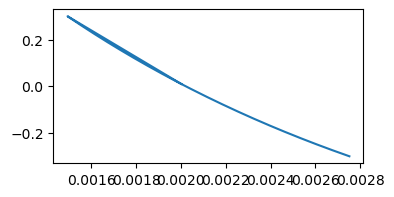

In [487]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [488]:
np.savetxt(fname_new,curves)

## 3:4 1k

In [95]:
ratio = '34_1k'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_23_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
# thal1f_neg3 = np.loadtxt(fname.format('neg3'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 3:4 neg

In [96]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

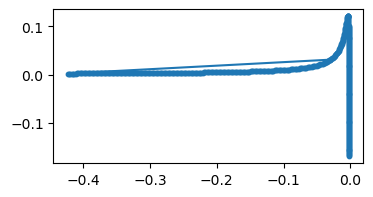

In [97]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [98]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

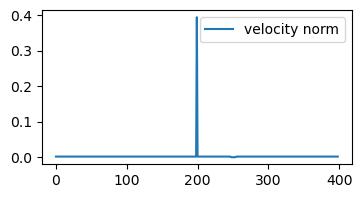

In [99]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [100]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [101]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [102]:
print(idxs)

[200]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [103]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

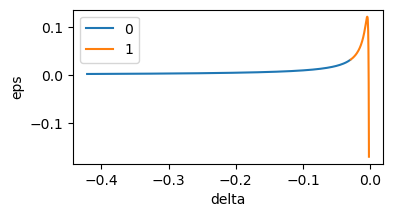

In [104]:
plot_disjoint_curves(disjoint_curves)

In [105]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1],])

In [106]:
y,x = curves.T

Plot to double check before saving

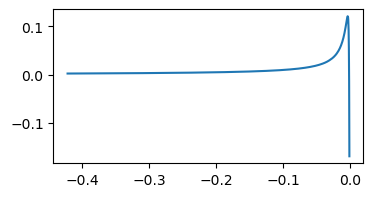

In [107]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [108]:
np.savetxt(fname_new,curves)

### 3:4 neg2

In [109]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

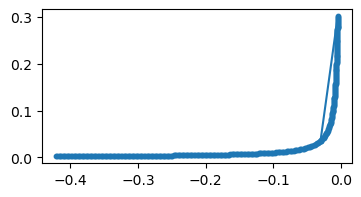

In [110]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [111]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

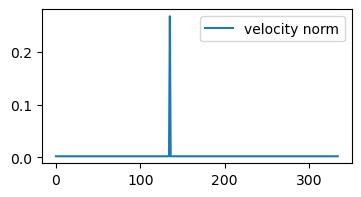

In [112]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [113]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [114]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [115]:
print(idxs)

[136]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [116]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

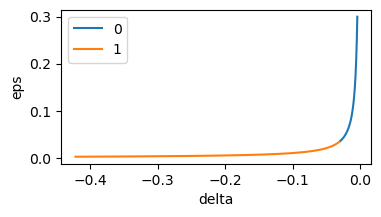

In [117]:
plot_disjoint_curves(disjoint_curves)

In [118]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [119]:
y,x = curves.T

Plot to double check before saving

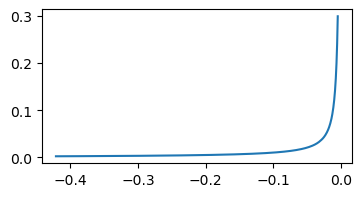

In [120]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [121]:
np.savetxt(fname_new,curves)

### 3:4 pos

In [122]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

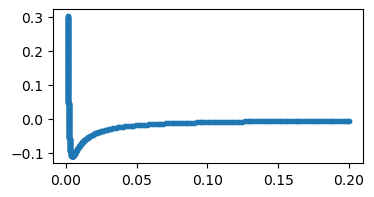

In [123]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

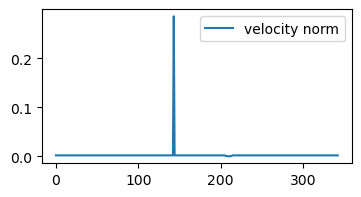

In [124]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

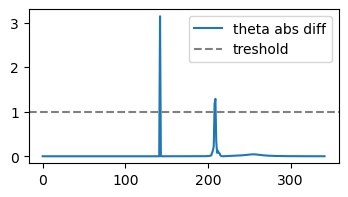

[142 208 209]


In [125]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [126]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [127]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

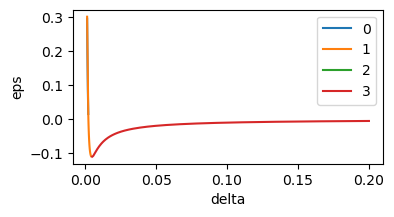

In [128]:
plot_disjoint_curves(disjoint_curves)

In [139]:
curves = np.concatenate([disjoint_curves[1],disjoint_curves[3]])

In [140]:
y,x = curves.T

Plot to double check before saving

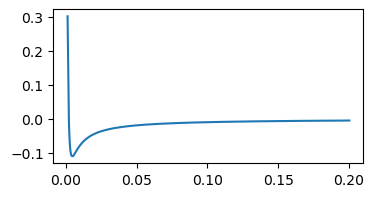

In [141]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [142]:
np.savetxt(fname_new,curves)

## 4:3

In [387]:
ratio = '43'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_23_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
thal1f_neg3 = np.loadtxt(fname.format('neg3'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 4:3 neg

In [388]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

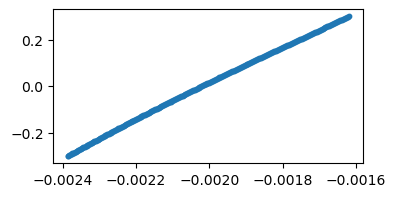

In [389]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [390]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

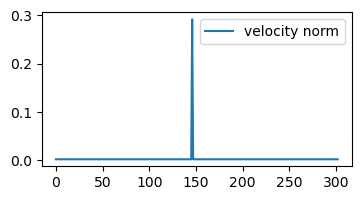

In [391]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [392]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [393]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [394]:
print(idxs)

[147]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [395]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

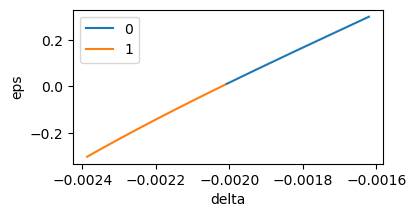

In [396]:
plot_disjoint_curves(disjoint_curves)

In [397]:
curves = np.concatenate([disjoint_curves[0][::-1],disjoint_curves[1],])

In [398]:
y,x = curves.T

Plot to double check before saving

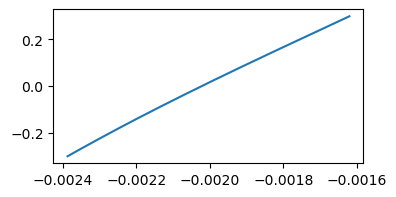

In [399]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [400]:
np.savetxt(fname_new,curves)

### 4:3 neg2

In [401]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

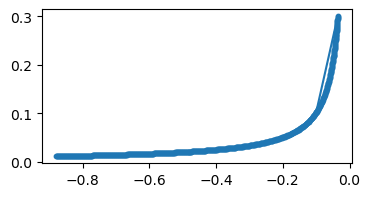

In [402]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [403]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

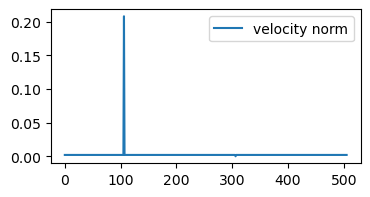

In [404]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [405]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [406]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [407]:
print(idxs)

[107]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [408]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

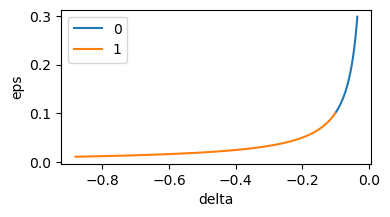

In [409]:
plot_disjoint_curves(disjoint_curves)

In [410]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [411]:
y,x = curves.T

Plot to double check before saving

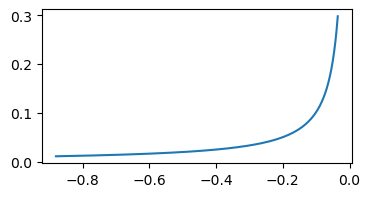

In [412]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [413]:
np.savetxt(fname_new,curves)

### 4:3 neg3

In [414]:
dat = thal1f_neg3
fname_new = fname.format('neg3_fixed')

Visualize the raw data

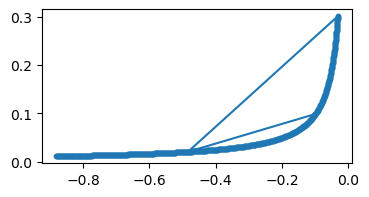

In [415]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [416]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

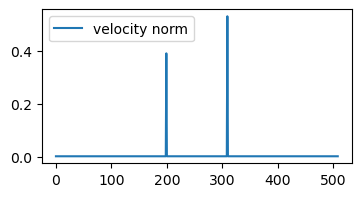

In [417]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [418]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [419]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [420]:
print(idxs)

[200 310]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [421]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

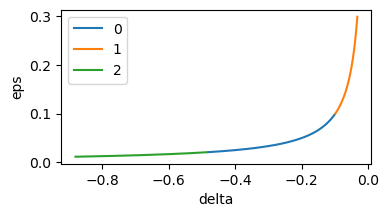

In [422]:
plot_disjoint_curves(disjoint_curves)

In [423]:
curves = np.concatenate([disjoint_curves[2][::-1],disjoint_curves[0][::-1],disjoint_curves[1]])

In [424]:
y,x = curves.T

Plot to double check before saving

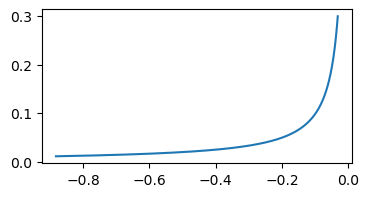

In [425]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [426]:
np.savetxt(fname_new,curves)

### 4:3 pos

In [427]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

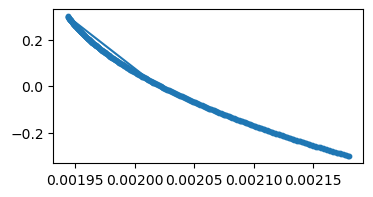

In [428]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

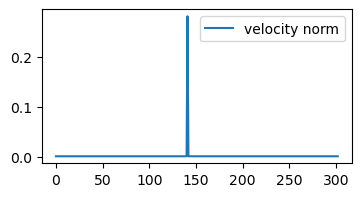

In [429]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

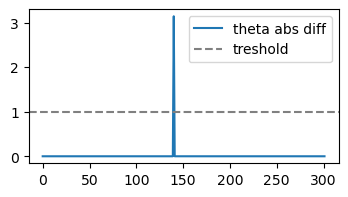

[140]


In [430]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [431]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [432]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

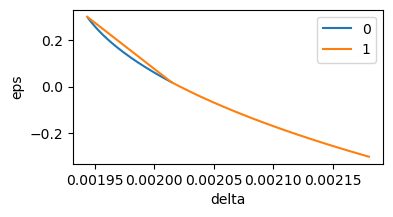

In [433]:
plot_disjoint_curves(disjoint_curves)

In [434]:
curves = np.concatenate([disjoint_curves[1][::-1],disjoint_curves[0][::-1]])

In [435]:
y,x = curves.T

Plot to double check before saving

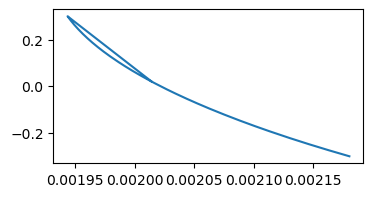

In [436]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [437]:
np.savetxt(fname_new,curves)

## 4:3 1k

In [217]:
ratio = '43_1k'
fname = '../v2_bifdat_2par/redu/thal2_'+ratio+'_o2_{}.dat'
# twopar_neg = np.loadtxt('../v2_bifdat_2par/redu/vdp_thal_23_o2_neg.dat')
thal1f_neg = np.loadtxt(fname.format('neg'))
thal1f_neg2 = np.loadtxt(fname.format('neg2'))
# thal1f_neg3 = np.loadtxt(fname.format('neg3'))
thal1f_pos = np.loadtxt(fname.format('pos'))

### 4:3 neg

In [248]:
dat = thal1f_neg
fname_new = fname.format('neg_fixed')

Visualize the raw data

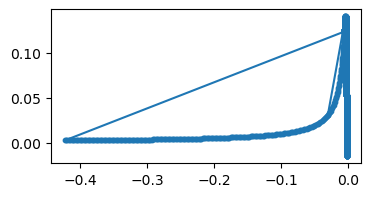

In [249]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

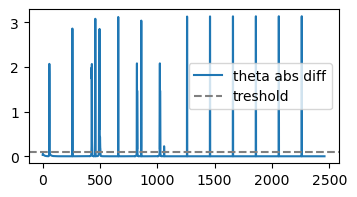

In [288]:
idxs1 = get_direction_change_idx(dat,dtheta=.1)

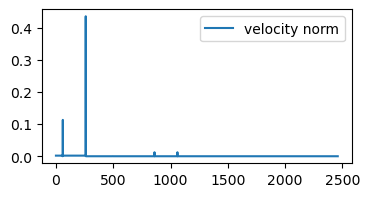

In [275]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [289]:
idxs = idxs1

Exclude curves with small  numbers of points (these are usually false starts)

In [290]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [291]:
print(idxs)

[  57   58   59   60  259  260  426  427  428  429  430  431  432  459
  490  491  492  493  494  495  496  497  498  499  500  501  502  503
  659  820  821  822  823  824  825  826  859  860 1020 1021 1022 1023
 1024 1025 1026 1059 1060 1259 1260 1459 1460 1659 1660 1859 1860 2059
 2060 2259 2260]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [292]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

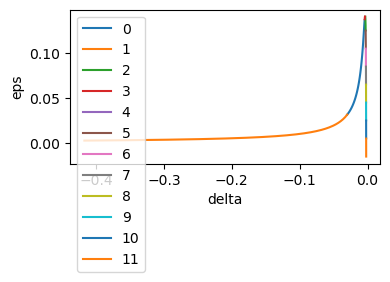

In [362]:
idxs = [0,4,28,
        36,39,47,
        49,51,53,
        55,57,59]
curves_temp = [disjoint_curves[i] for i in idxs]
plot_disjoint_curves(curves_temp)

(0.0, 0.16)

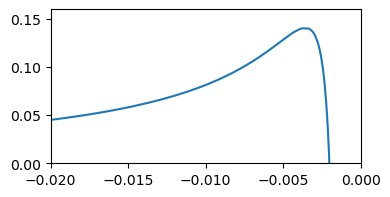

In [401]:
curves = np.concatenate([disjoint_curves[4][::-1],disjoint_curves[0],disjoint_curves[36][::-1],disjoint_curves[28],
                         disjoint_curves[47],disjoint_curves[49],disjoint_curves[51],
                         disjoint_curves[53],disjoint_curves[55],disjoint_curves[57],disjoint_curves[59],
                         #disjoint_curves[8],disjoint_curves[18]])
                        ])
y,x = curves.T
fig,axs = plt.subplots()
axs.plot(x,y)
axs.set_xlim(-.02,.0)
axs.set_ylim(.0,.16)

In [402]:
np.savetxt(fname_new,curves)

### 4:3 neg2

In [182]:
dat = thal1f_neg2
fname_new = fname.format('neg2_fixed')

Visualize the raw data

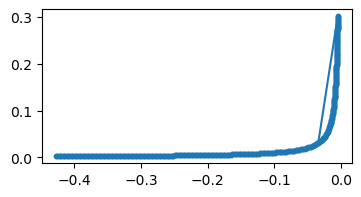

In [183]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

In [184]:
# idxs1 = get_direction_change_idx(dat,dtheta=2)

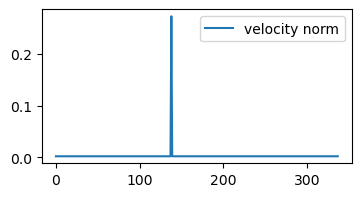

In [185]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

Get union of large angle and magnitude change.

In [186]:
idxs = idxs2

Exclude curves with small  numbers of points (these are usually false starts)

In [187]:
# idxs = exclude_small_idx_range(idxs,min_neighbors = 100)

In [188]:
print(idxs)

[139]


Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [189]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

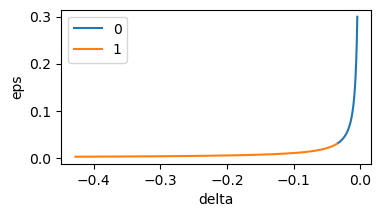

In [190]:
plot_disjoint_curves(disjoint_curves)

In [191]:
curves = np.concatenate([disjoint_curves[0][::-1,:],disjoint_curves[1]])

In [192]:
y,x = curves.T

Plot to double check before saving

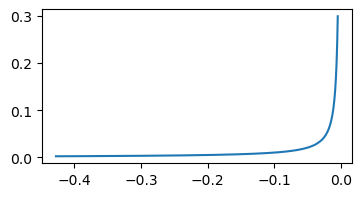

In [193]:
fig,axs = plt.subplots()
axs.plot(x,y)

In [194]:
np.savetxt(fname_new,curves)

### 4:3 pos

In [225]:
dat = thal1f_pos
fname_new = fname.format('pos_fixed')

Visualize the raw data

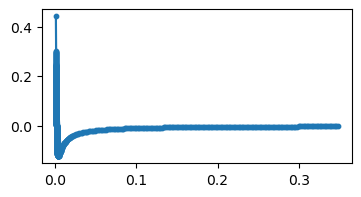

In [226]:
fig,axs = plt.subplots()
axs.plot(dat[:,1],dat[:,0])
axs.scatter(dat[:,1],dat[:,0],s=10)

Collect indices where there is a discontinuity

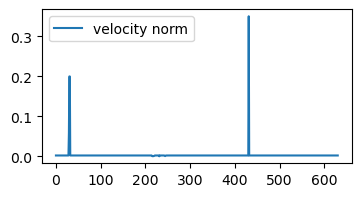

In [227]:
idxs2 = get_magnitude_change_idx(dat,dx=.1)

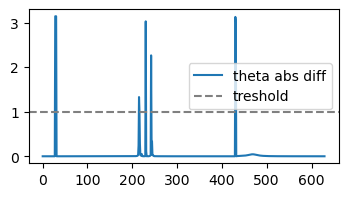

[ 28  29  30 215 216 230 242 430 431]


In [228]:
idxs1 = get_direction_change_idx(dat,dtheta=1)
print(idxs1)

In [230]:
idxs =  idxs1

Collect curves between discontinuities (exclude the above indices, only collect points in between them)

In [231]:
disjoint_curves = disjoint_curves_list(dat,idxs)

Visualize curves to help determine which curves to keep and which to throw out

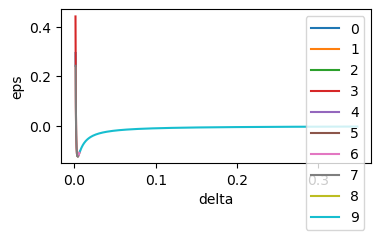

In [232]:
plot_disjoint_curves(disjoint_curves)

(-0.15, -0.05)

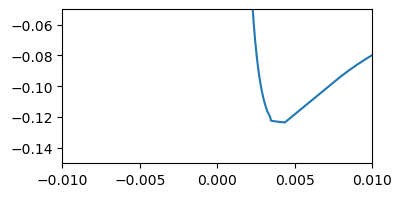

In [247]:
curves = np.concatenate([disjoint_curves[7][::-1],disjoint_curves[9]])
y,x = curves.T
fig,axs = plt.subplots()
axs.plot(x,y)
axs.set_xlim(-0.01,.01)
axs.set_ylim(-.15,-.05)

In [246]:
np.savetxt(fname_new,curves)